# Visualização e Bancos de Dados com Python - Gráfico de Sankey

Olá, Cientistas de Dados!!!

Neste artigo, vamos conhecer mais uma biblioteca de gráficos para Python, a biblioteca Plotly!!! 

Vamos utilizar esta nova biblioteca para plotar um gráfico especial, chamado de Sankey Chart.

## Mas o que é um Sankey Chart???

O Sankey Chart ou Diagrama de Sankey é uma forma de visualização de dados desenvolvida durate a revolução industrial. O método de análise foi criado pelo capitão irlandês Matthew Sankey.

O diagrama de Sankey é uma representação visual da relação entre duas variáveis, que possui um ponto de partida e pelo menos um ponto de chegada.

Vamos de exemplo?

### Exemplo

O gráfico abaixo mostra rotas aéreas, onde a largura das linhas indica a frequência da rota. Este é um caso de Diagrama de Sankey que trabalha com 2 variáveis que são aeroportos em países e a frequencia dos vôos, e foi organizado com 1 ponto de partida e 3 pontos de chegada, representando as escalas.  

<center>

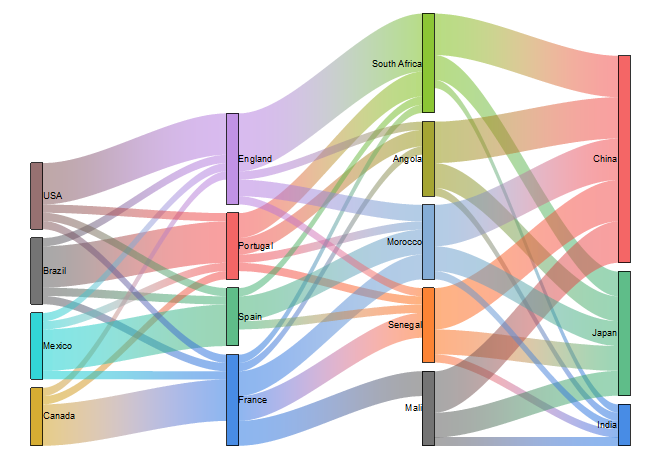

</center>

## Este notebook foi criado para...

Realizar a análise exploratória de um dataset de informações demográficas de ganhadores do Oscar, em algumas das categorias. O objetivo é demonstrar visualmente correlações entre estas informações demográficas. Para isto, iremos utilizar o Sankey Chart.

## Código

A primeira coisa a fazer é fazer o download do dataset que iremos utilizar. Para isto, iremos utilizar o comando mágico ! do notebook e buscar este dataset e outros do nosso repositório [Github](https://github.com/labeduc).

In [7]:
!git lfs clone -l -s https://github.com/labeduc/datasets.git

          with new flags from 'git clone'

'git clone' has been updated in upstream Git to have comparable
speeds to 'git lfs clone'.
Cloning into 'datasets'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 15 (delta 0), reused 12 (delta 0), pack-reused 0
Unpacking objects: 100% (15/15), done.
Git LFS: (5 of 5 files) 104.20 MB / 104.20 MB


Depois que temos o folder datasets na área de arquivos do notebook, podemos começar o código de fato. A primeira coisa a fazer é importar as bibliotecas que iremos utilizar. Como a biblioteca MatPlotLib e Seaborn não criam este tipo de diagrama, vamos utilizar outra biblioteca, chamada Plotly.

In [12]:
import plotly.graph_objects as go
import pandas as pd

Agora, é só carregar nossos dados em um DataFrame Pandas. O caminho do arquivo ficará armazenado em uma variável, caso precisemos reutilizar. Observe também que adicionamos o parâmetro de encoding no comando para carregar os dados, pois tivemos alguns erros nas primeiras tentativas para executar a função read_csv.

In [ ]:
nome_arquivo = '/content/datasets/oscars/demographics.csv'
df = pd.read_csv(nome_arquivo, encoding="iso-8859-1")

A próxima etapa é selecionar quais campos vamos utilizar em nossa análise e produzir um DataFrame com os dados agrupados por tais campos. Escolhemos os campos de etnia (race_ethnicity) e prêmio (award), para verificar a frequência com a qual cada etnia é agraciada com prêmios.

In [ ]:
agg = df.groupby(["race_ethnicity", "award"]).count()
agg = agg.reset_index()
agg = agg[["race_ethnicity", "award", "_golden"]]

Por fim, temos a preparação dos dados. Este gráfico tem a peculiaridade de necessitar de 3 ou mais arrays com os valores na ordem em que serão plotados. Iremos preparar os arrays

In [9]:
nodes = {}
idx = 0

# Primeira parte da preparação é pegar todos os possíveis nodos dos nossos dados
# (que são as etnias e prêmios) e salvar em um dicionário, onde também atribuímos
# um índice numérico

for item in agg["race_ethnicity"]:
  if item not in nodes:
    nodes[item] = idx
    idx += 1

for item in agg["award"]:
  if item not in nodes:
    nodes[item] = idx
    idx += 1

# Depois criamos a estrutura que será usada para a plotagem
link = {
    "source": [nodes[item] for item in agg["race_ethnicity"]], # adicionamos todos os nodos de origem, mas em vez da descrição, utilizamos os índices 
    "target": [nodes[item] for item in agg["award"]], # adicionamos todos os nodos de destino, mas em vez da descrição, utilizamos os índices  
    "value": agg["_golden"].tolist()
    }

# Próximo passo é agregar os labels dos dados, que são as chaves no nosso dicionário de nodos
rawdata = {
  "node": {"label": list(nodes.keys())},
  "link": link
}

# Criamos o diagrama
data = go.Sankey(**rawdata)

# Fazemos a plotagem
fig = go.Figure(data=data)
fig.show()

O gráfico ficou bem bonito, não é mesmo? Pois é, ficou, mas não se engane, foi proposital. Escolhemos duas categorias com poucos elementos, de forma que o gráfico ficou bonito. Quer ver o que acontece ao selecionarmos outras categorias, com mais elementos?

In [14]:
agg = df.groupby(["year_of_award", "race_ethnicity"]).count()
agg = agg.reset_index()
agg = agg[["year_of_award", "race_ethnicity", "_golden"]]

nodes_source = {}
nodes_target = {}
labels = []
idx = 0

for item in agg["year_of_award"]:
  if item not in nodes_source:
    nodes_source[item] = idx
    labels.append(item)
    idx += 1

for item in agg["race_ethnicity"]:
  if item not in nodes_target:
    nodes_target[item] = idx
    labels.append(item)  
    idx += 1

link = {
    "source": [nodes_source[item] for item in agg["year_of_award"]], 
    "target": [nodes_target[item] for item in agg["race_ethnicity"]],
    "value": agg["_golden"].tolist()
    }

rawdata = {
  "node": {"label": labels},
  "link": link
}

data = go.Sankey(**rawdata)

fig = go.Figure(data=data)
fig.show()

É, não ficou muito bom, certo? Vamos resolver isso adicionando um comando que atualiza o tamanho da área a ser utilizada para plotagem.

In [15]:
data = go.Sankey(**rawdata)

fig = go.Figure(data=data)
fig.update_layout(height=2000)
fig.show()

Mais uma vez, tudo funcionou certinho, não é mesmo? Não, não funcionou não, pequeno gafanhoto! Observe como os anos estão desordenados... O Sankey tenta organizar as categorias para deixar o layout mais bonito. Mas como aquilo representam anos, precisamos manter a ordem temporal. No código abaixo isso é resolvido, confira.

In [16]:
agg = df.groupby(["year_of_award", "race_ethnicity"]).count()
agg = agg.reset_index()
agg = agg[["year_of_award", "race_ethnicity", "_golden"]]

nodes_source = {}
nodes_target = {}
labels = []
x = []  # este novos arrays irão guardar as coordenadas dos nodos, 
y = []  # de forma que iremos forçar a ordenação
idx = 0
yidx = 0

for item in agg["year_of_award"]:
  if item not in nodes_source:
    nodes_source[item] = idx
    labels.append(item)
    x.append(0.001)
    y.append(yidx / 285)
    idx += 1
    yidx += 2.5

yidx = 0
for item in agg["race_ethnicity"]:
  if item not in nodes_target:
    nodes_target[item] = idx
    labels.append(item)  
    x.append(0.999)
    y.append(yidx / 100)
    idx += 1
    yidx += 1

link = {
    "source": [nodes_source[item] for item in agg["year_of_award"]], 
    "target": [nodes_target[item] for item in agg["race_ethnicity"]],
    "value": agg["_golden"].tolist()
    }

rawdata = {
  "node": {"label": labels,
           "x": x,
           "y": y},
  "link": link
}

data = go.Sankey(**rawdata)

fig = go.Figure(data=data)
fig.update_layout(height=2000)
fig.show()

*Et voilá!!!* Conseguimos gerar uma versão um pouco mais compacta.

# Encerrando

Espero que todos tenham aproveitado este artigo e que tenham aprendido bastante. Vamos deixar aqui alguns links que podem complementar os seus estudos e prepara-los para sua futura profissão!

Alguns destes links estarão escritos na lingua inglesa, mas você pode ativar a tradução automática no seu Google Chrome!!!

- Documentação Oficial
  - [Pandas](https://pandas.pydata.org/docs/)
  - [MatPlotLib](https://matplotlib.org/stable/index.html)
  - [Plotly](https://plotly.com/python/)
- Artigos/Vídeos
  - [Como sair do 0 em Plotly para Python](https://www.youtube.com/watch?v=ebeBxiaYZRQ)
  - [Tutorial MatplotLib](https://www.hashtagtreinamentos.com/saia-do-zero-em-graficos-python?gclid=Cj0KCQjwgO2XBhCaARIsANrW2X0yjydMamgqMk2xZYgPLqN-X3Wyp00DK7f_5AiBnrWYNCJJLHlp8pIaAizLEALw_wcB)
  - [How to use Pandas Power](https://medium.com/@nabiila-29/how-to-use-pandas-power-e58bfa4aa22)
  - [Tutorial NetworkX](https://networkx.org/documentation/latest/tutorial.html)

  